In [1]:
!pip install keras
import keras

You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# After you upload the zipped file, you can unzip the file to obtain the images
!unzip -o -q chest-xray-pneumonia.zip

In [5]:
# What is the working directory
!pwd #Show current working directory
import os
os.chdir('/notebooks')

/notebooks


In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

""" New Layer: Dropout """
classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

classifier.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4608)             

In [7]:
# In[38]:
# Let's train our network using data augmentation and dropout:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'chest_xray/train',
        # All images will be resized to 150x150
        target_size=(64, 64),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'chest_xray/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

history = classifier.fit_generator(train_generator,
      steps_per_epoch=5216,
      epochs=5,
      validation_data=test_generator,
      validation_steps=624)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
5216/5216 [==============================] - 1928s 370ms/step - loss: 0.2315 - accuracy: 0.9024 - val_loss: 0.4207 - val_accuracy: 0.9052
Epoch 2/5
5216/5216 [==============================] - 1884s 361ms/step - loss: 0.1526 - accuracy: 0.9410 - val_loss: 0.3223 - val_accuracy: 0.8732
Epoch 3/5
5216/5216 [==============================] - 1883s 361ms/step - loss: 0.1345 - accuracy: 0.9490 - val_loss: 0.3762 - val_accuracy: 0.8593
Epoch 4/5
5216/5216 [==============================] - 1886s 362ms/step - loss: 0.1229 - accuracy: 0.9537 - val_loss: 0.0687 - val_accuracy: 0.9025
Epoch 5/5
5216/5216 [==============================] - 1885s 361ms/step - loss: 0.1145 - accuracy: 0.9564 - val_loss: 0.5589 - val_accuracy: 0.9084


In [8]:
# Let's save our model -- we will be using it in the section on convnet visualization.
classifier.save('chestxray_improvement.hdf5')

# save training history to another file
import pickle 
filehandler = open('history_improvement.pkl', 'wb') 
pickle.dump(history, filehandler)

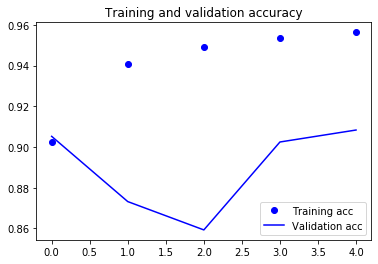

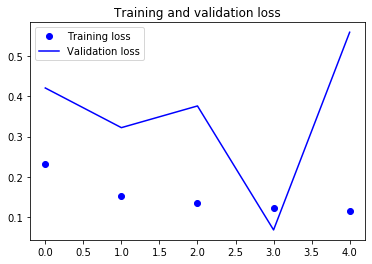

In [10]:
# Let's plot our results again:
import pickle
with open('history_improvement.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()